# Threshold simulation for CSS codes

In [2]:
# import
import matplotlib.pyplot as plt
import numpy as np
import json

## Example: Steane Codes [[7,1,3]]

In [3]:
data = json.load(open('tmp.json'))
data['data_map']

[[0.01, 0.0024],
 [0.02, 0.0069],
 [0.03, 0.0142],
 [0.04, 0.0277],
 [0.05, 0.0421],
 [0.060000000000000005, 0.0603],
 [0.07, 0.0775],
 [0.08, 0.0883],
 [0.09, 0.1141],
 [0.09999999999999999, 0.1244]]

In [4]:
def data2plot(data_columns):
    p_qubit=[]
    p_block=[]
    for pair in data_columns:
        p_qubit.append(pair[0])
        p_block.append(pair[1])
    return p_qubit,p_block
p_qubit,p_block = data2plot(data['data_map'])

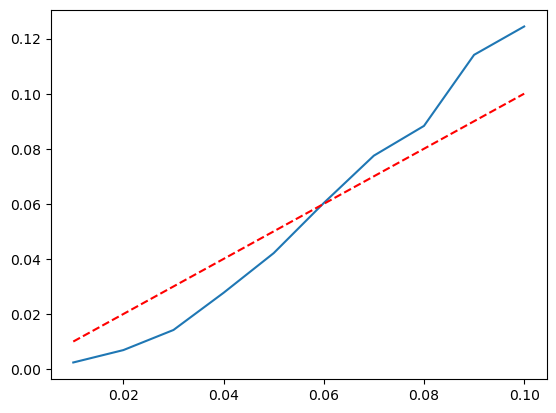

In [5]:
#plt.plot(data['data_map'])
plt.plot(p_qubit,p_block)

h = np.array(p_qubit)
# red dashes, blue squares and green triangles
plt.plot(h, h, 'r--')

Observations:
- pseudo threhold about 0.06
- distance = ?

TODO:
- [ ] add `min weight decoder`, compare time and decoding rate

## Appendix
### sample plot use `matplotlib`

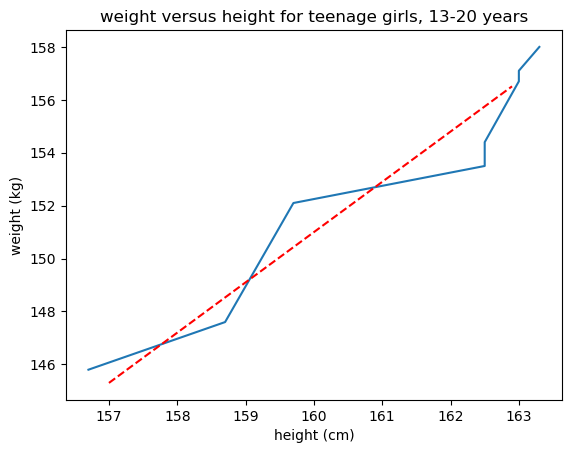

In [9]:

weight = [45.8,47.6,52.1,53.5,54.4,56.7,57.1,58.0]
weight = [145.8,147.6,152.1,153.5,154.4,156.7,157.1,158.0]
height = [156.7,158.7, 159.7,162.5,162.5,163,163,163.3]

plt.plot(height,weight)
plt.title("weight versus height for teenage girls, 13-20 years")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# plot a function

h = np.arange(157., 163., .1)
w = 1.9 * h -153
# red dashes, blue squares and green triangles
plt.plot(h, w, 'r--')

# this is a mimic of linear regression/linear fit